In [1]:
import pandas as pd

In [2]:
# Load your dataset
df = pd.read_csv('realtor-data.zip.csv')

In [3]:
# View basic structure
print("Initial shape:", df.shape)
print("Column names:", df.columns.tolist())
print(df.head())

Initial shape: (2226382, 12)
Column names: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


In [4]:
dup_rows = df[df.duplicated()]
print(f" Duplicate rows found: {dup_rows.shape[0]}")

 Duplicate rows found: 0


In [5]:
missing_counts = df.isnull().sum()

In [6]:
missing_percent = (missing_counts / len(df)) * 100

In [7]:
# Combine into a summary table
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent.round(2)
})

In [8]:
# Filter to only show columns with missing data
missing_summary = missing_summary[missing_summary['missing_count'] > 0]

print("🔍 Missing Data Summary:")
print(missing_summary.sort_values(by='missing_percent', ascending=False))

🔍 Missing Data Summary:
                missing_count  missing_percent
prev_sold_date         734297            32.98
house_size             568484            25.53
bath                   511771            22.99
bed                    481317            21.62
acre_lot               325589            14.62
street                  10866             0.49
brokered_by              4533             0.20
price                    1541             0.07
city                     1407             0.06
zip_code                  299             0.01
state                       8             0.00


In [9]:
# Drop rows missing price, city, state — these are crucial
df = df.dropna(subset=['price', 'city', 'state'])

In [10]:
# Drop rows where zip_code is missing
df = df.dropna(subset=['zip_code'])

In [11]:
# Fill numeric fields with median
for col in ['bed', 'bath', 'acre_lot', 'house_size']:
    df[col] = df[col].fillna(df[col].median())

In [12]:
# Keep prev_sold_date as-is; missing means "never sold before"
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

In [13]:
# Street: drop rows if needed
df = df.dropna(subset=['street'])

In [14]:
 # TYPE CONVERSION
df['price'] = df['price'].astype(int)
df['zip_code'] = df['zip_code'].astype(int)

In [15]:
# Convert street, brokered_by to string IDs
df['street'] = df['street'].astype('Int64').astype(str)
df['brokered_by'] = df['brokered_by'].astype('Int64').astype(str)

In [16]:
# Parse dates
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

In [17]:
# FEATURE ENGINEERING
# Create total_rooms as bed + bath
#df['total_rooms'] = df['bed'] + df['bath']

In [18]:
# Create a binary indicator if the house was previously sold
df['was_previously_sold'] = df['prev_sold_date'].notnull().astype(int)

In [19]:
# # SAVE
# df.to_csv('realtor-data-features.csv', index=False)
# print("📦 Data cleaned and features added → 'realtor-data-features.csv'")

In [20]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold
0,103378,for_sale,105000,3.0,2.0,0.12,1962661,Adjuntas,Puerto Rico,601,920.0,NaT,0
1,52707,for_sale,80000,4.0,2.0,0.08,1902874,Adjuntas,Puerto Rico,601,1527.0,NaT,0
2,103379,for_sale,67000,2.0,1.0,0.15,1404990,Juana Diaz,Puerto Rico,795,748.0,NaT,0
3,31239,for_sale,145000,4.0,2.0,0.10,1947675,Ponce,Puerto Rico,731,1800.0,NaT,0
4,34632,for_sale,65000,6.0,2.0,0.05,331151,Mayaguez,Puerto Rico,680,1760.0,NaT,0


In [21]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold
2226377,23009,sold,359900,4.0,2.0,0.33,353094,Richland,Washington,99354,3600.0,2022-03-25,1
2226378,18208,sold,350000,3.0,2.0,0.10,1062149,Richland,Washington,99354,1616.0,2022-03-25,1
2226379,76856,sold,440000,6.0,3.0,0.50,405677,Richland,Washington,99354,3200.0,2022-03-24,1
2226380,53618,sold,179900,2.0,1.0,0.09,761379,Richland,Washington,99354,933.0,2022-03-24,1
2226381,108243,sold,580000,5.0,3.0,0.31,307704,Richland,Washington,99354,3615.0,2022-03-23,1


In [22]:
 #Convert to integers
df['bed'] = df['bed'].astype(int)
df['bath'] = df['bath'].astype(int)

In [23]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold
0,103378,for_sale,105000,3,2,0.12,1962661,Adjuntas,Puerto Rico,601,920.0,NaT,0
1,52707,for_sale,80000,4,2,0.08,1902874,Adjuntas,Puerto Rico,601,1527.0,NaT,0
2,103379,for_sale,67000,2,1,0.15,1404990,Juana Diaz,Puerto Rico,795,748.0,NaT,0
3,31239,for_sale,145000,4,2,0.10,1947675,Ponce,Puerto Rico,731,1800.0,NaT,0
4,34632,for_sale,65000,6,2,0.05,331151,Mayaguez,Puerto Rico,680,1760.0,NaT,0


In [24]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold
2226377,23009,sold,359900,4,2,0.33,353094,Richland,Washington,99354,3600.0,2022-03-25,1
2226378,18208,sold,350000,3,2,0.10,1062149,Richland,Washington,99354,1616.0,2022-03-25,1
2226379,76856,sold,440000,6,3,0.50,405677,Richland,Washington,99354,3200.0,2022-03-24,1
2226380,53618,sold,179900,2,1,0.09,761379,Richland,Washington,99354,933.0,2022-03-24,1
2226381,108243,sold,580000,5,3,0.31,307704,Richland,Washington,99354,3615.0,2022-03-23,1


In [25]:
# Step 1: Convert acre_lot to sqft
df['lot_sqft'] = df['acre_lot'] * 43560

# Step 2: Calculate price per sqft (avoid division by zero)
df['price_per_sqft'] = df.apply(
    lambda row: row['price'] / row['lot_sqft'] if row['lot_sqft'] > 0 else None,
    axis=1
)

In [26]:
# Round off to two
df['price_per_sqft'] = df['price_per_sqft'].round(2)

In [27]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold,lot_sqft,price_per_sqft
0,103378,for_sale,105000,3,2,0.12,1962661,Adjuntas,Puerto Rico,601,920.0,NaT,0,5227.2,20.09
1,52707,for_sale,80000,4,2,0.08,1902874,Adjuntas,Puerto Rico,601,1527.0,NaT,0,3484.8,22.96
2,103379,for_sale,67000,2,1,0.15,1404990,Juana Diaz,Puerto Rico,795,748.0,NaT,0,6534.0,10.25
3,31239,for_sale,145000,4,2,0.10,1947675,Ponce,Puerto Rico,731,1800.0,NaT,0,4356.0,33.29
4,34632,for_sale,65000,6,2,0.05,331151,Mayaguez,Puerto Rico,680,1760.0,NaT,0,2178.0,29.84


In [28]:
#price per interior square foot
df['price_per_house_sqft'] = df.apply(
    lambda row: row['price'] / row['house_size'] if row['house_size'] > 0 else None,
    axis=1
)
df['price_per_house_sqft'] = df['price_per_house_sqft'].round(2)


In [29]:
# 1. Fill 'prev_sold_date' nulls with 'Never Sold'
df['prev_sold_date'] = df['prev_sold_date'].fillna('Never Sold')

# 2. Drop rows with missing 'brokered_by' or 'price_per_sqft' (assuming those are critical)
df.dropna(subset=['brokered_by', 'price_per_sqft'], inplace=True)

# 3. Confirm cleanup
print(df[['brokered_by', 'prev_sold_date', 'price_per_sqft']].isnull().sum())

brokered_by       0
prev_sold_date    0
price_per_sqft    0
dtype: int64


In [30]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold,lot_sqft,price_per_sqft,price_per_house_sqft
0,103378,for_sale,105000,3,2,0.12,1962661,Adjuntas,Puerto Rico,601,920.0,Never Sold,0,5227.2,20.09,114.13
1,52707,for_sale,80000,4,2,0.08,1902874,Adjuntas,Puerto Rico,601,1527.0,Never Sold,0,3484.8,22.96,52.39
2,103379,for_sale,67000,2,1,0.15,1404990,Juana Diaz,Puerto Rico,795,748.0,Never Sold,0,6534.0,10.25,89.57
3,31239,for_sale,145000,4,2,0.10,1947675,Ponce,Puerto Rico,731,1800.0,Never Sold,0,4356.0,33.29,80.56
4,34632,for_sale,65000,6,2,0.05,331151,Mayaguez,Puerto Rico,680,1760.0,Never Sold,0,2178.0,29.84,36.93


In [31]:
# SAVE
df.to_csv('cleaned_real_estate_data.csv', index=False)
print(" Data cleaned and features added → 'cleaned_real_estate_data.csv'")

 Data cleaned and features added → 'cleaned_real_estate_data.csv'


In [32]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold,lot_sqft,price_per_sqft,price_per_house_sqft
0,103378,for_sale,105000,3,2,0.12,1962661,Adjuntas,Puerto Rico,601,920.0,Never Sold,0,5227.2,20.09,114.13
1,52707,for_sale,80000,4,2,0.08,1902874,Adjuntas,Puerto Rico,601,1527.0,Never Sold,0,3484.8,22.96,52.39
2,103379,for_sale,67000,2,1,0.15,1404990,Juana Diaz,Puerto Rico,795,748.0,Never Sold,0,6534.0,10.25,89.57
3,31239,for_sale,145000,4,2,0.10,1947675,Ponce,Puerto Rico,731,1800.0,Never Sold,0,4356.0,33.29,80.56
4,34632,for_sale,65000,6,2,0.05,331151,Mayaguez,Puerto Rico,680,1760.0,Never Sold,0,2178.0,29.84,36.93


In [33]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,was_previously_sold,lot_sqft,price_per_sqft,price_per_house_sqft
2226377,23009,sold,359900,4,2,0.33,353094,Richland,Washington,99354,3600.0,2022-03-25 00:00:00,1,14374.8,25.04,99.97
2226378,18208,sold,350000,3,2,0.10,1062149,Richland,Washington,99354,1616.0,2022-03-25 00:00:00,1,4356.0,80.35,216.58
2226379,76856,sold,440000,6,3,0.50,405677,Richland,Washington,99354,3200.0,2022-03-24 00:00:00,1,21780.0,20.20,137.50
2226380,53618,sold,179900,2,1,0.09,761379,Richland,Washington,99354,933.0,2022-03-24 00:00:00,1,3920.4,45.89,192.82
2226381,108243,sold,580000,5,3,0.31,307704,Richland,Washington,99354,3615.0,2022-03-23 00:00:00,1,13503.6,42.95,160.44


In [34]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 brokered_by             0
status                  0
price                   0
bed                     0
bath                    0
acre_lot                0
street                  0
city                    0
state                   0
zip_code                0
house_size              0
prev_sold_date          0
was_previously_sold     0
lot_sqft                0
price_per_sqft          0
price_per_house_sqft    0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

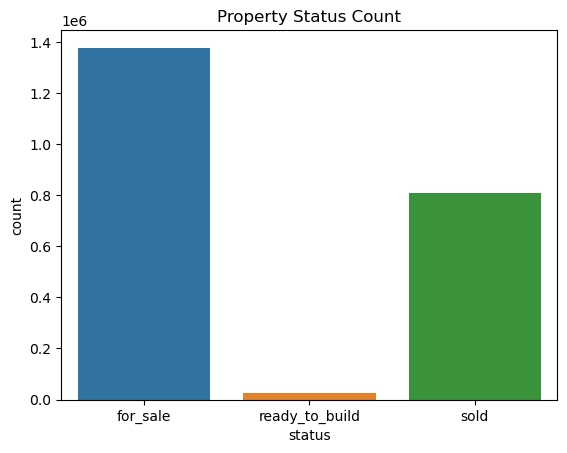

In [36]:
# 5. Categorical Features
sns.countplot(data=df, x='status')
plt.title("Property Status Count")
plt.show()

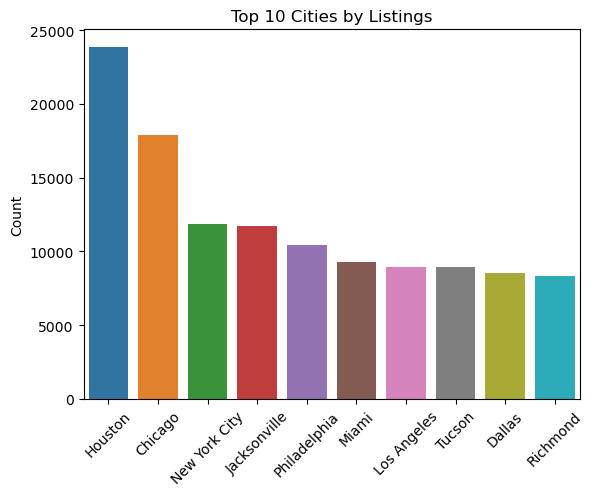

In [37]:
# Top 10 cities by frequency
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Listings")
plt.ylabel("Count")
plt.show()

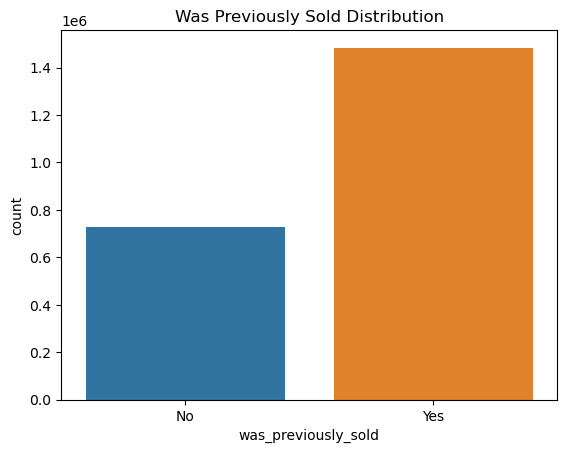

In [38]:
# Was previously sold
sns.countplot(x='was_previously_sold', data=df)
plt.title("Was Previously Sold Distribution")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

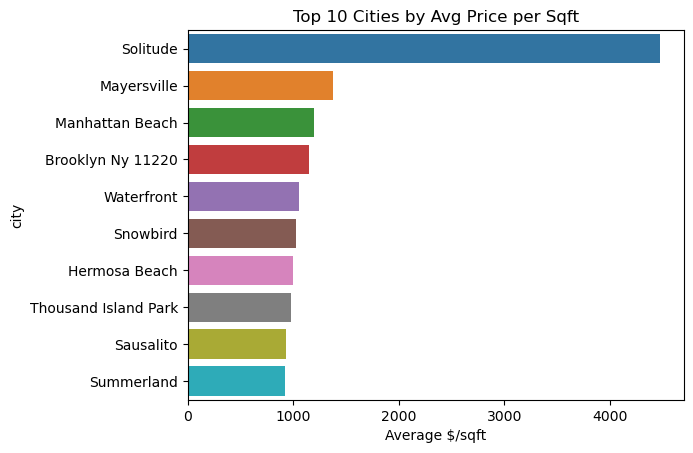

In [39]:
# 7. City-Level Analysis (Price per Sqft)
city_avg = df.groupby('city')['price_per_sqft'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_avg.values, y=city_avg.index)
plt.title("Top 10 Cities by Avg Price per Sqft")
plt.xlabel("Average $/sqft")
plt.show()

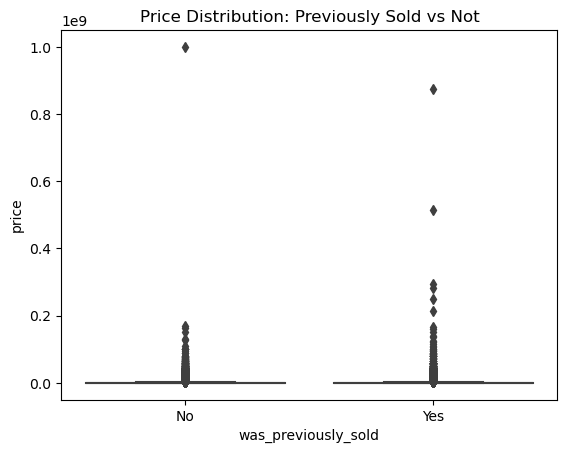

In [40]:
# 8. Previously Sold vs Not - Price Comparison
sns.boxplot(x='was_previously_sold', y='price', data=df)
plt.title("Price Distribution: Previously Sold vs Not")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [41]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

NameError: name 'num_cols' is not defined

<Figure size 1000x800 with 0 Axes>